In [58]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt

sns.set(style = 'dark')
from sklearn.metrics import classification_report



In [59]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telecom_cust=data.copy()
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [61]:
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [62]:
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [63]:
telecom_cust.dropna(inplace = True)

In [64]:
#Remove customer IDs from the data set
df2 = telecom_cust.iloc[:,1:]

In [65]:
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [66]:
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


[50.46928327645051, 49.53071672354949] ['Male', 'Female']


Text(0.5, 1.0, 'Gender Distribution')

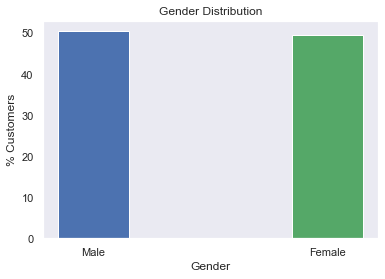

In [67]:
dist=(telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust))
dist_values=[i for i in dist.values]
dist_index=[i for i in dist.index]
print(dist_values,dist_index)
plt.bar(dist_index,dist_values,width=0.3,color=['b','g'])
                                                                          
           
plt.ylabel('% Customers')
plt.xlabel('Gender')
plt.ylabel('% Customers')
plt.title('Gender Distribution')


Text(0.5, 1.0, '% of Senior Citizens')

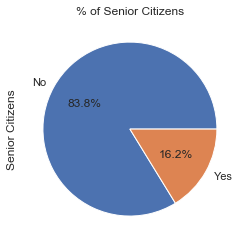

In [68]:
senior=(telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))
senior_values = [i for i in senior.values]
senior_index=[i for i in senior.index]
plt.pie(senior_values,autopct='%.1f%%', labels = ['No', 'Yes'])                                                                           
plt.ylabel('Senior Citizens',fontsize = 12)
plt.title('% of Senior Citizens', fontsize = 12)

Text(0.5, 1.0, '# of Customers by their tenure')

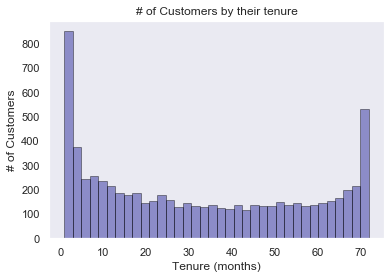

In [69]:
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of Customers by Contract Type')

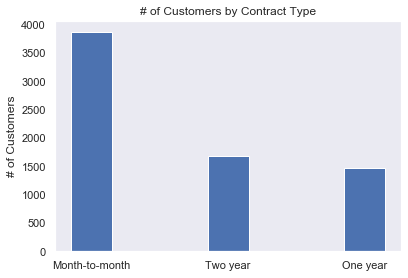

In [70]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,0.8,0.8])
ctr= telecom_cust['Contract'].value_counts()
val=[i for i in ctr.values]
ind=[i for i in ctr.index]
axes.bar(ind,val,width=0.3)
axes.set_ylabel('# of Customers')
axes.set_title('# of Customers by Contract Type')

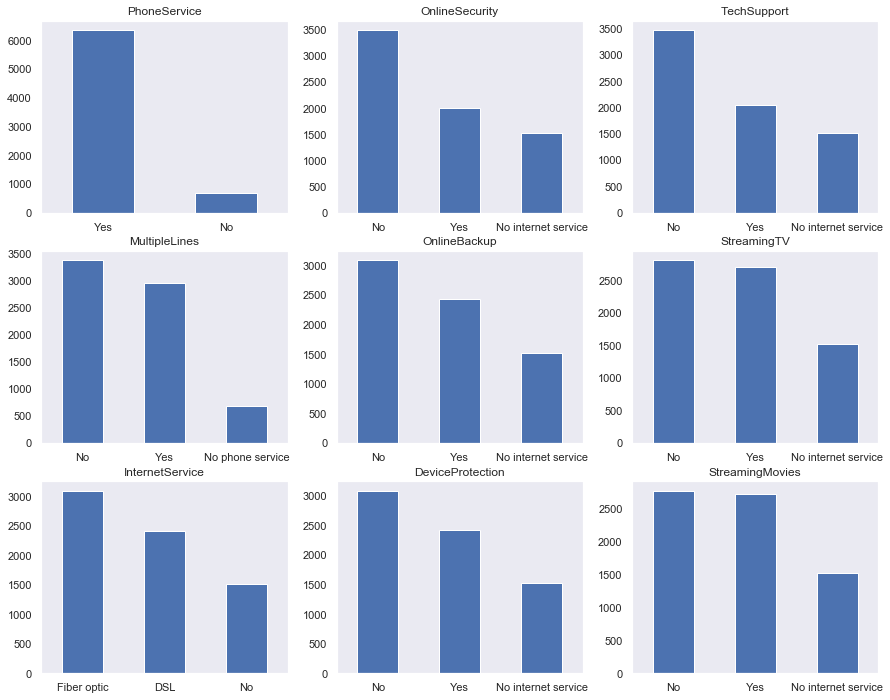

In [71]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

In [72]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score

def generate_accuracy_and_heatmap(model, x, y):
    cm = confusion_matrix(model.predict(x),y)
    sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy Socre:', ac)
    print('F1 score: ', f_score)
    print ("\n")
    print (pd.crosstab(pd.Series(model.predict(x), name='Predicted'),pd.Series(y,name='Actual')))
    return 1

In [75]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
result = model1.fit(X_train, y_train)


C:\Users\91852\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Socre: 0.8075829383886256
F1 score:  0.5848670756646217


Actual        0    1
Predicted           
0          1418  244
1           162  286

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



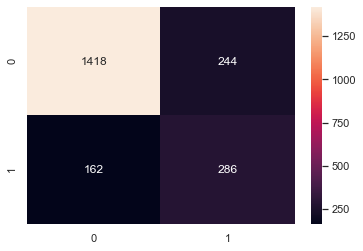

In [76]:
from sklearn import metrics
prediction_test = model1.predict(X_test)
# Print the prediction accuracy
generate_accuracy_and_heatmap(model1,X_test,y_test)
y_class=y_test.reshape(-1,1)
print()
print('Classification Report:')
print(classification_report(y_class,model1.predict(X_test)))



AxesSubplot(0.125,0.125;0.775x0.755)


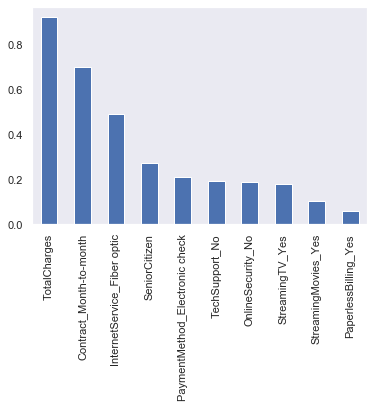

In [77]:
weights = pd.Series(model1.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


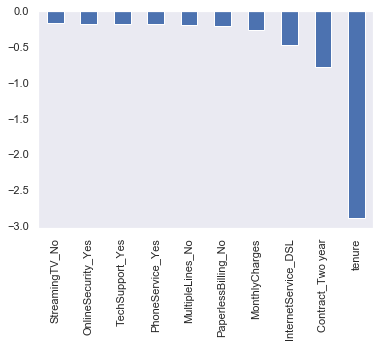

In [78]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus

C:\Users\91852\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [80]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Accuracy Socre: 0.7203791469194313
F1 score:  0.47602131438721135


Actual        0    1
Predicted           
0          1252  262
1           328  268

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1580
           1       0.45      0.51      0.48       530

    accuracy                           0.72      2110
   macro avg       0.64      0.65      0.64      2110
weighted avg       0.73      0.72      0.73      2110



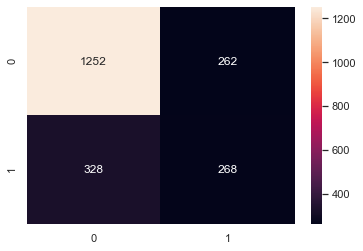

In [81]:
#clf.score(X_test,y_test)
generate_accuracy_and_heatmap(clf,X_test,y_test)
print()
print('Classification Report:')
print(classification_report(y_class,clf.predict(X_test)))



In [82]:
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display

In [84]:
graph = Source(tree.export_graphviz(clf,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = X.columns, 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True                         
                                       )
                  )
display(graph)

In [85]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [86]:
selected_features=SelectKBest(chi2, k=5).fit(X_train,y_train)
print("Scores")
print(selected_features.scores_)
print ("P - Values")
print (selected_features.pvalues_)

Scores
[1.05848629e+02 1.73086835e+02 3.73539160e+01 5.42504763e+01
 5.80584464e-02 5.79170703e-02 5.63763299e+01 6.02137104e+01
 4.06236188e+01 9.64219272e+01 6.82359701e-01 7.33951254e-02
 1.85143678e+00 6.82359701e-01 3.42379144e+00 5.24899933e+01
 2.71381628e+02 2.14213513e+02 2.93266203e+02 2.14213513e+02
 1.00275462e+02 2.00550169e+02 2.14213513e+02 2.03590446e+01
 1.83629345e+02 2.14213513e+02 1.49457735e+01 3.01612983e+02
 2.14213513e+02 1.03247602e+02 4.92989071e+01 2.14213513e+02
 1.46487434e+01 6.45557806e+01 2.14213513e+02 7.98554370e+00
 3.81563299e+02 1.37692766e+02 3.58068237e+02 1.00743590e+02
 6.91296370e+01 5.52355250e+01 7.06673371e+01 3.07839840e+02
 3.78362553e+01]
P - Values
[7.95883214e-25 1.56677105e-39 9.85228549e-10 1.76494365e-13
 8.09591386e-01 8.09818909e-01 5.98464866e-14 8.50973815e-15
 1.84562258e-10 9.28333036e-23 4.08775352e-01 7.86456141e-01
 1.73616380e-01 4.08775352e-01 6.42632637e-02 4.32446190e-13
 5.67273191e-61 1.65439412e-48 9.65814698e-66 1.65

In [87]:
selected_features_df=pd.DataFrame({'feature':list(X_train.columns),'Scores':selected_features.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,feature,Scores
36,Contract_Month-to-month,381.563299
38,Contract_Two year,358.068237
43,PaymentMethod_Electronic check,307.839840
27,TechSupport_No,301.612983
18,OnlineSecurity_No,293.266203
16,InternetService_Fiber optic,271.381628
19,OnlineSecurity_No internet service,214.213513
25,DeviceProtection_No internet service,214.213513
22,OnlineBackup_No internet service,214.213513
17,InternetService_No,214.213513


In [88]:
x_train_chi=selected_features.transform(X_train)
x_test_chi=selected_features.transform(X_test)
X_train.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2785,0.0,0.690141,0.909453,0.638397,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
896,0.0,0.154930,0.802488,0.127181,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3958,1.0,0.718310,0.878109,0.646556,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [89]:
x_train_chi[0:5]

array([[0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0.],
       [1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.]])

In [90]:
dt_chi_model=clf.fit(x_train_chi,y_train)

Accuracy Socre: 0.7843601895734598
F1 score:  0.48703494926719276


Actual        0    1
Predicted           
0          1439  314
1           141  216

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1580
           1       0.61      0.41      0.49       530

    accuracy                           0.78      2110
   macro avg       0.71      0.66      0.68      2110
weighted avg       0.77      0.78      0.77      2110



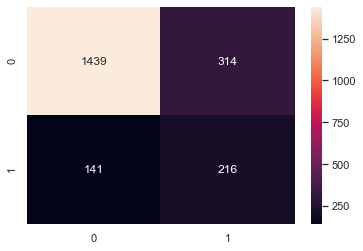

In [91]:
dt_chi_model.score(x_test_chi,y_test)
generate_accuracy_and_heatmap(dt_chi_model,x_test_chi,y_test)
print()
print('Classification Report')
print(classification_report(y_class,dt_chi_model.predict(x_test_chi)))



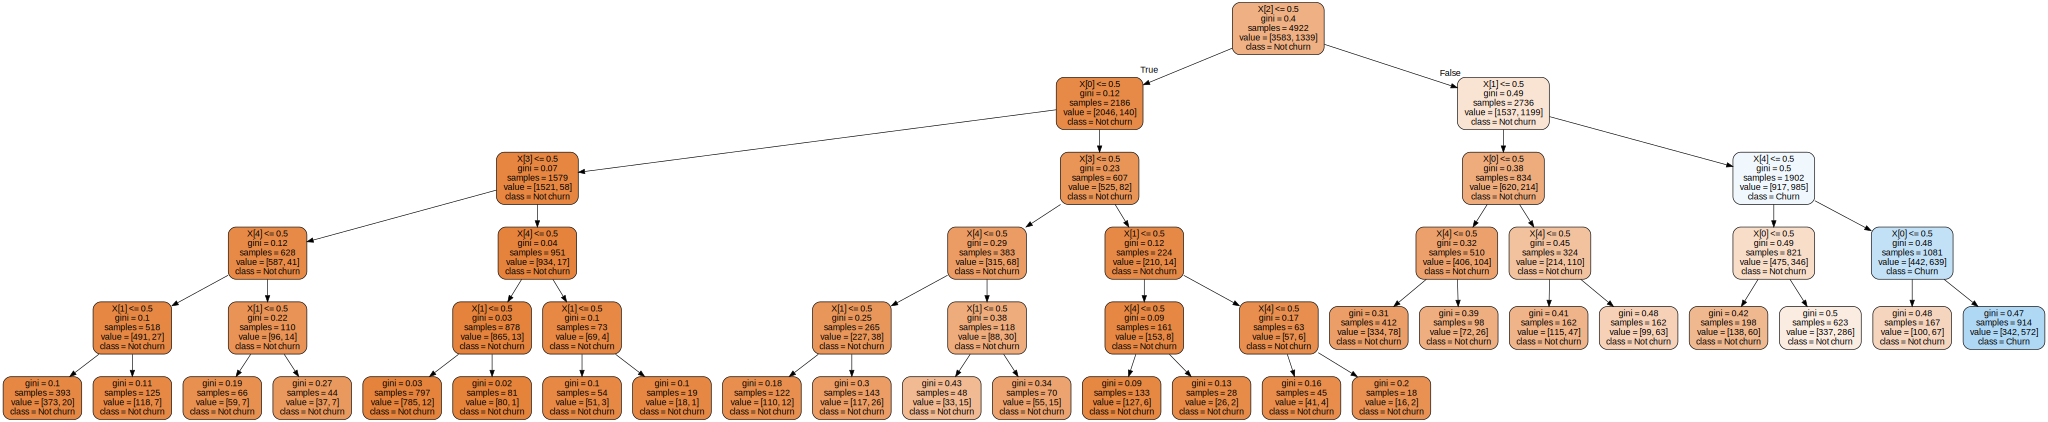

In [92]:
graph = Source(tree.export_graphviz(dt_chi_model,out_file=None,
                                        rounded=True,proportion = False,
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True                         
                                       )
                  )
display(graph)